In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
df=pd.read_csv("loan_approval_dataset.csv")

In [69]:
df.shape

(4269, 13)

In [70]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [71]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [72]:
df.duplicated().sum()

np.int64(0)

In [73]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [74]:
df.drop(columns=['loan_id'], axis=1,inplace=True)

In [75]:
df[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [76]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [77]:
df.rename(columns={
    " bank_asset_value": "bank_asset_value",
    " cibil_score": "cibil_score",
    " no_of_dependents": "no_of_dependents",
    " education": "education",
    " self_employed": "self_employed",
    " loan_status": "loan_status",
    " luxury_assets_value": "luxury_assets_value",
    " commercial_assets_value": "commercial_assets_value",
    " residential_assets_value": "residential_asset_value",
    " loan_term": "loan_term",
    " income_annum": "income_annum"
}, inplace=True)


In [78]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       ' loan_amount', 'loan_term', 'cibil_score', 'residential_asset_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

EDA

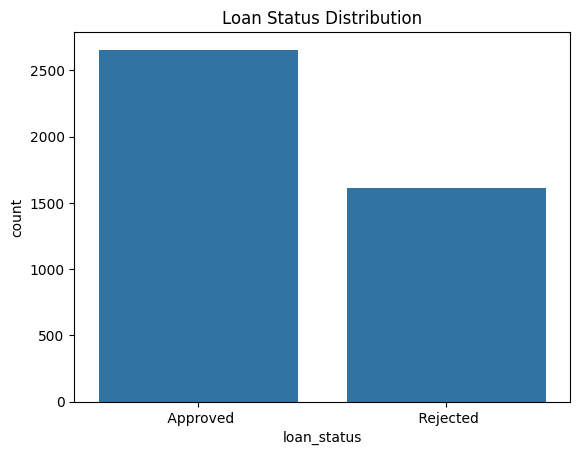

loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


In [79]:
sns.countplot(data=df, x="loan_status")
plt.title("Loan Status Distribution")
plt.show()

print(df["loan_status"].value_counts(normalize=True)*100)


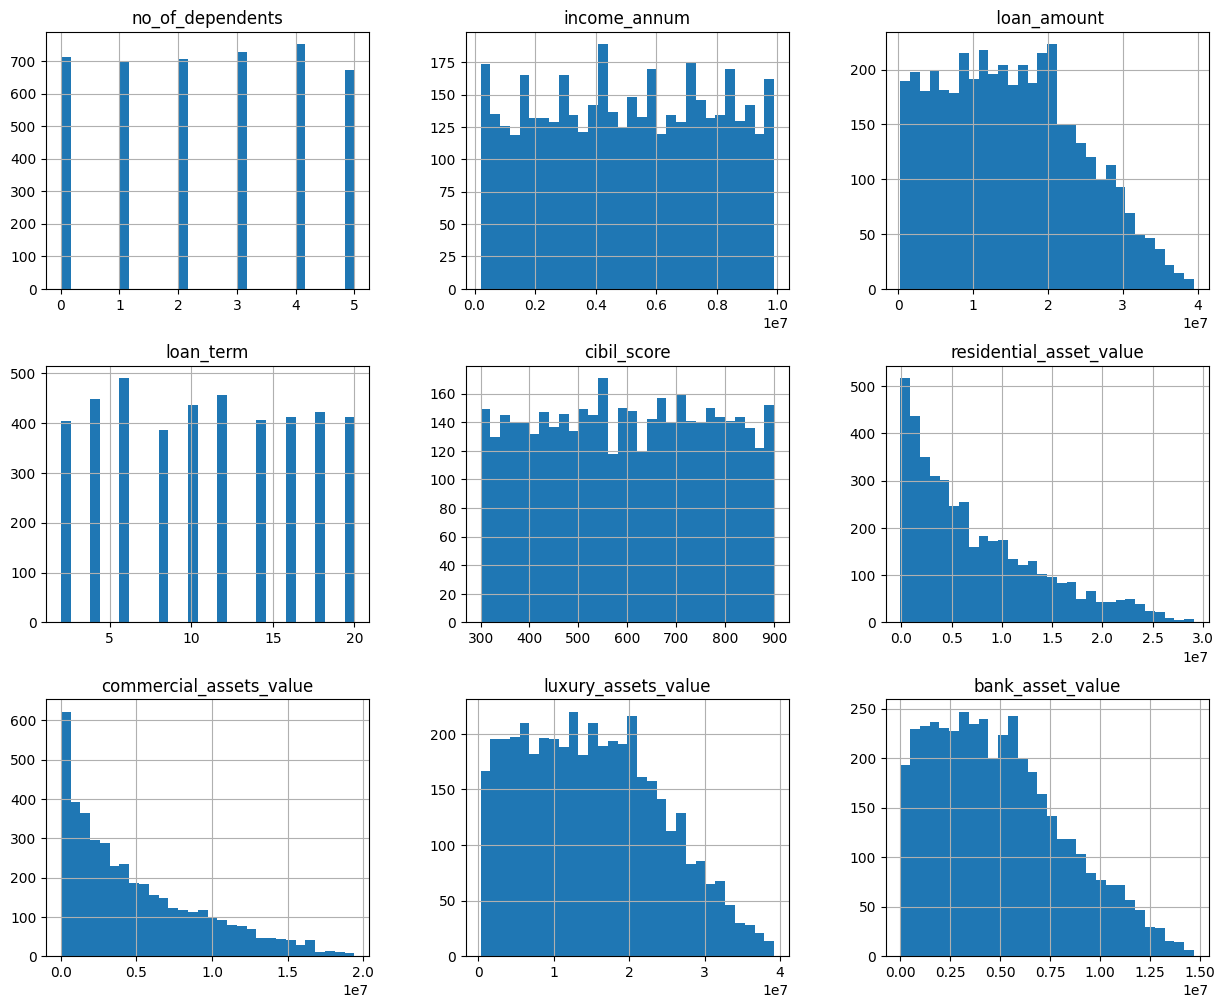

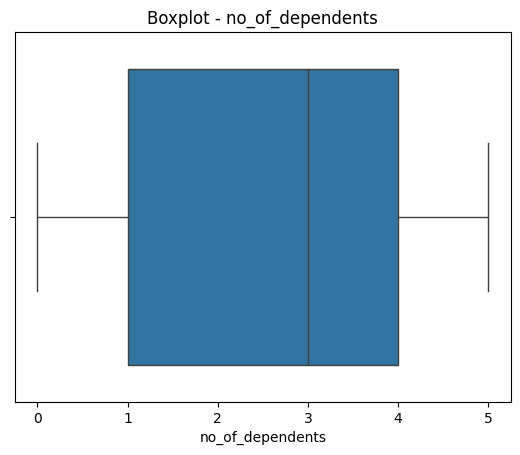

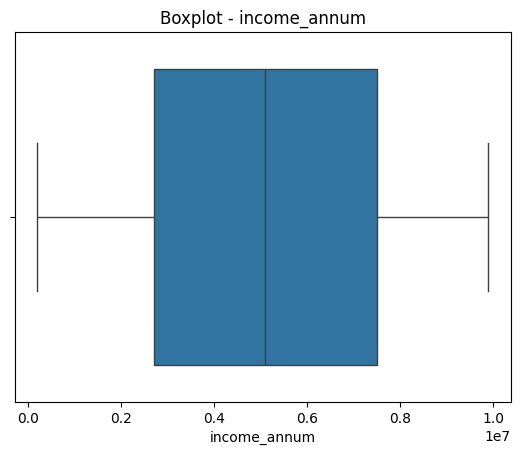

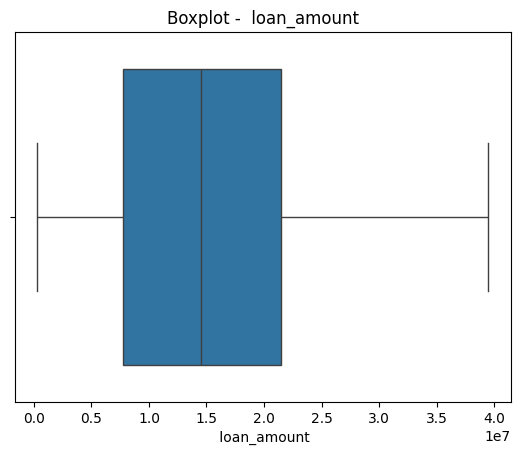

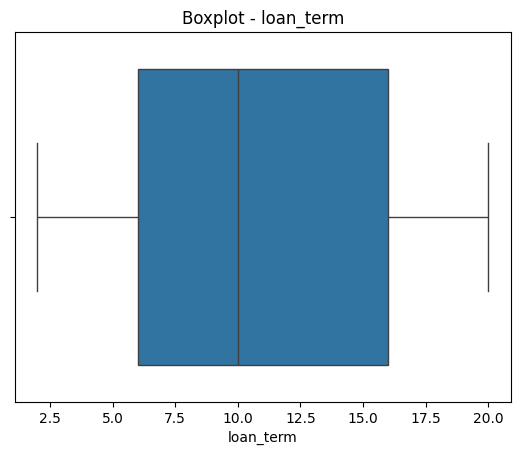

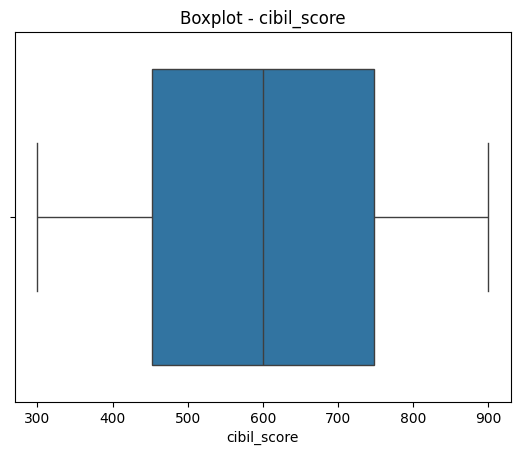

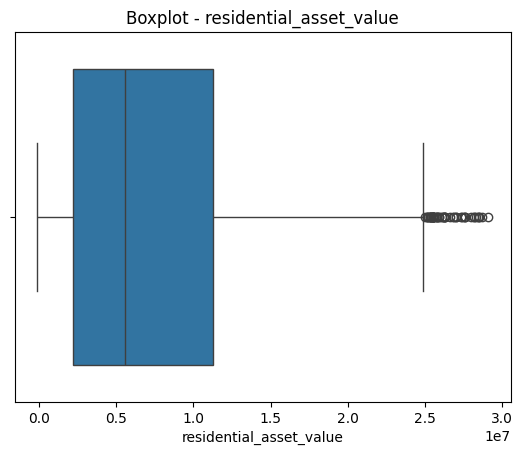

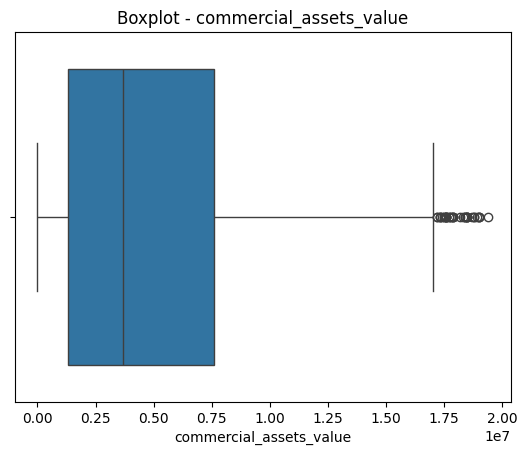

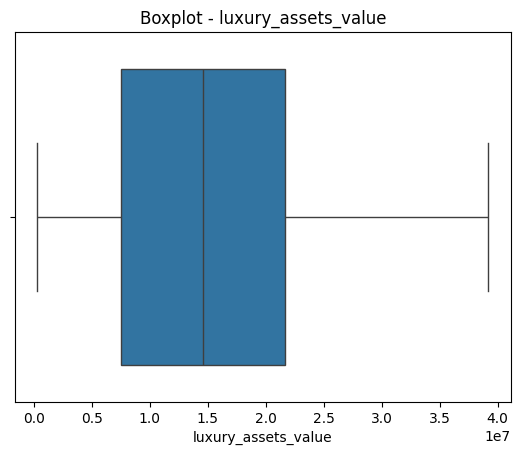

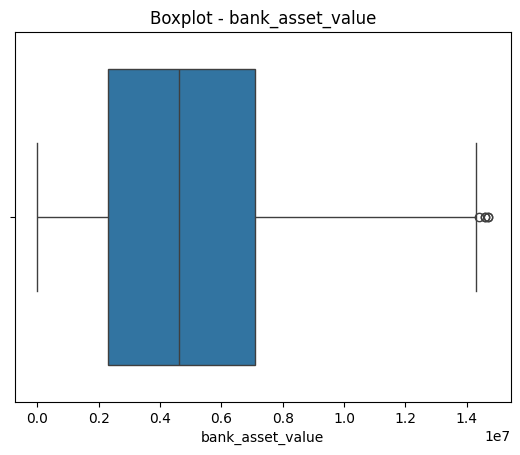

In [80]:
num_cols = ['no_of_dependents', 'income_annum', ' loan_amount',
            'loan_term', 'cibil_score', 'residential_asset_value',
            'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Histograms
df[num_cols].hist(bins=30, figsize=(15,12))
plt.show()

# Boxplots for outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


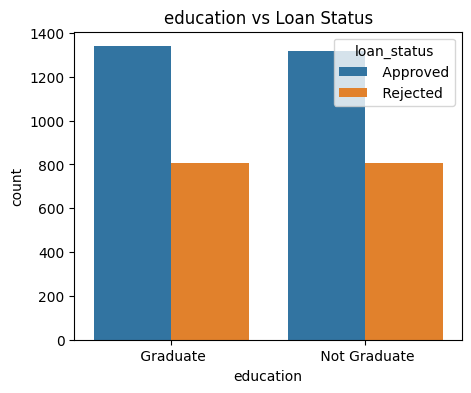

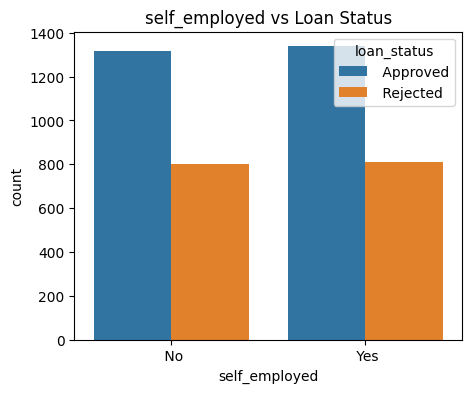

In [81]:
cat_cols = ["education", "self_employed"]

for col in cat_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, hue="loan_status")
    plt.title(f"{col} vs Loan Status")
    plt.show()


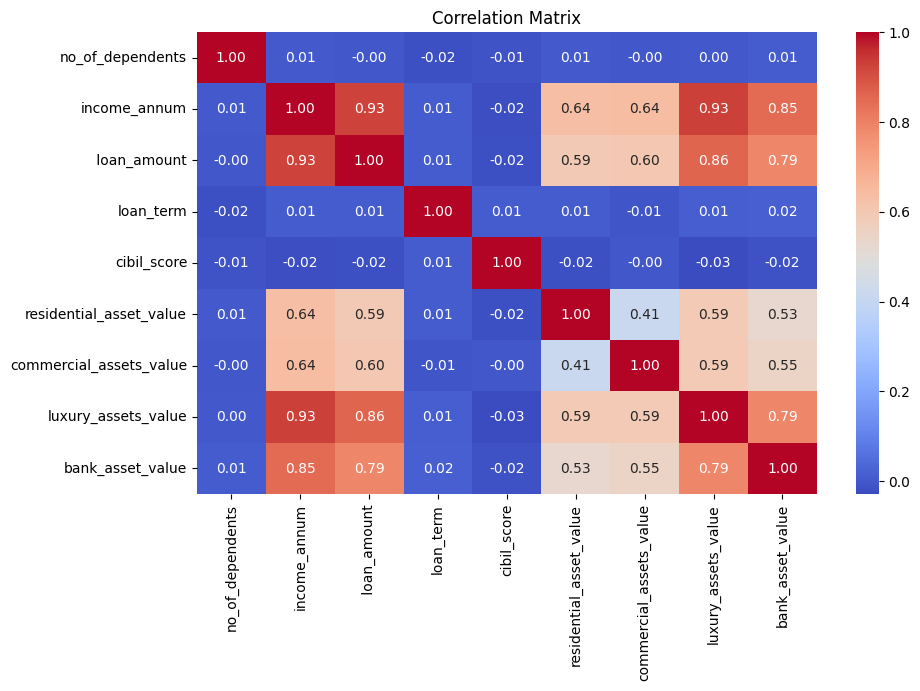

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


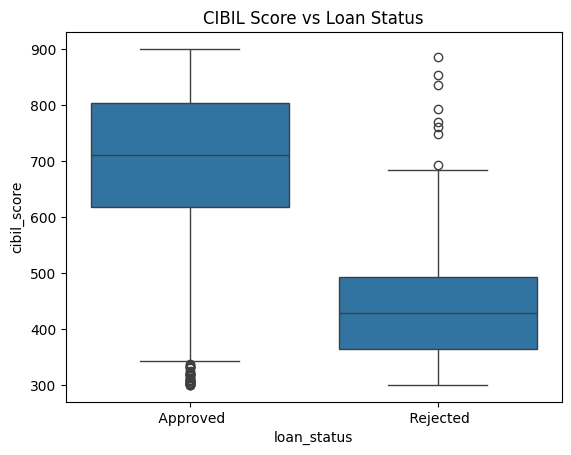

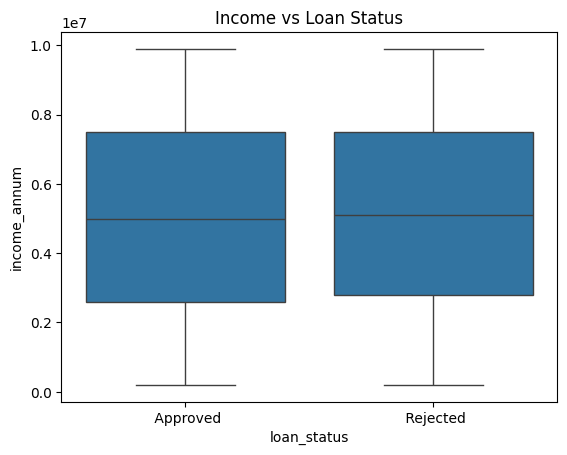

In [83]:
sns.boxplot(x="loan_status", y="cibil_score", data=df)
plt.title("CIBIL Score vs Loan Status")
plt.show()

sns.boxplot(x="loan_status", y="income_annum", data=df)
plt.title("Income vs Loan Status")
plt.show()


In [84]:
print(df["education"].unique())
print(df["self_employed"].unique())
df["education"] = df["education"].replace({' Graduate': 'Graduate',' Not Graduate':"Not Graduate"})
df["self_employed"] = df["self_employed"].replace({' No': 'No', ' Yes': 'Yes'})

[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [85]:
df["education"] = df["education"].map({"Not Graduate": 0, "Graduate": 1})
df["self_employed"] = df["self_employed"].map({"No": 0, "Yes": 1})

In [86]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_asset_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [87]:
df["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [88]:
df["loan_status"]=df["loan_status"].map({' Approved': 0, " Rejected": 1})

In [89]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_asset_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [90]:
X= df.drop(columns=["loan_status"], axis=1)
y= df["loan_status"]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Class distribution in train:", y_train.value_counts(normalize=True))
print("Class distribution in test:", y_test.value_counts(normalize=True))

Train shape: (3415, 11)
Test shape: (854, 11)
Class distribution in train: loan_status
0    0.622255
1    0.377745
Name: proportion, dtype: float64
Class distribution in test: loan_status
0    0.62178
1    0.37822
Name: proportion, dtype: float64


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854

Confusion Matrix:
 [[505  26]
 [ 40 283]]


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

log_reg = LogisticRegression(solver="saga", max_iter=5000, n_jobs=-1)

param_dist_lr = {
    "C": loguniform(1e-3, 1e2),   # inverse regularization strength
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "l1_ratio": [0, 0.25, 0.5, 0.75, 1]  # only relevant if penalty="elasticnet"
}


In [95]:
from sklearn.svm import SVC

svc = SVC(probability=True)

param_dist_svc = {
    "C": loguniform(1e-3, 1e2),
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]  # used if kernel="poly"
}


In [96]:
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform

nb = GaussianNB()

param_dist_nb = {
    "var_smoothing": uniform(1e-9, 1e-2)
}


In [97]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

dt = DecisionTreeClassifier(random_state=42)

param_dist_dt = {
    "max_depth": randint(2, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "criterion": ["gini", "entropy", "log_loss"]
}


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, loguniform

gb = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    "n_estimators": randint(50, 500),
    "learning_rate": loguniform(1e-3, 0.3),
    "max_depth": randint(2, 10),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "subsample": [0.6, 0.8, 1.0],
    "max_features": ["sqrt", "log2", None]
}


In [99]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

param_dist_ada = {
    "n_estimators": randint(50, 500),
    "learning_rate": loguniform(1e-3, 1)
}


In [100]:
models = {
    "Logistic Regression": (log_reg, param_dist_lr),
    "AdaBoost": (ada, param_dist_ada),
}

best_models = {}

for name, (model, params) in models.items():
    print(f"\nTuning {name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,       # tuneable (20 → 50 is typical)
        scoring="accuracy",    # or "roc_auc"
        cv=3,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    search.fit(X_train_scaled, y_train)
    print(f"Best params for {name}: {search.best_params_}")
    print(f"Best score: {search.best_score_:.4f}")
    best_models[name] = search.best_estimator_



Tuning Logistic Regression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/rahulmanchanda/Desktop/Project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/rahulmanchanda/Desktop/Project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/rahulmanchanda/Desktop/Project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/rahulmanchanda/Desktop/Project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/rahulmanchanda/Desktop/Project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: User

Best params for Logistic Regression: {'C': np.float64(0.011526449540315618), 'l1_ratio': 0.75, 'penalty': 'l1'}
Best score: 0.9139

Tuning AdaBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params for AdaBoost: {'learning_rate': np.float64(0.8906204386161677), 'n_estimators': 180}
Best score: 0.9693


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Test Results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))



Logistic Regression Test Results:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       531
           1       0.94      0.88      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.92      0.93       854
weighted avg       0.93      0.93      0.93       854

Confusion Matrix:
 [[512  19]
 [ 39 284]]
ROC-AUC: 0.9732061126561835

AdaBoost Test Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[525   6]
 [ 11 312]]
ROC-AUC: 0.9956533907050777


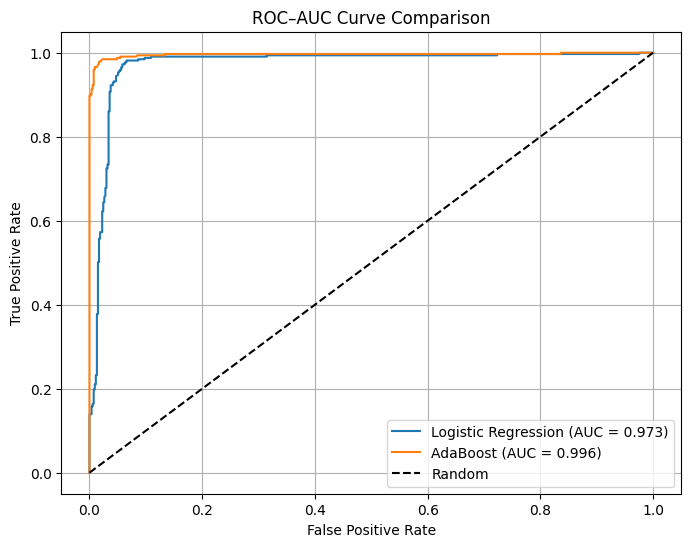

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in best_models.items():
    # Probabilities for the positive class
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    
    # Get ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Random classifier line
plt.plot([0,1], [0,1], 'k--', label="Random")

plt.title("ROC–AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ✅ Correct way to pass parameters
ada = AdaBoostClassifier(
    learning_rate=0.8906204386161677,
    n_estimators=180,
    random_state=42
)

# Fit the model
ada.fit(X_train_scaled, y_train)

# Predictions
y_pred = ada.predict(X_test_scaled)

# Evaluation
print("AdaBoost Test Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, ada.predict_proba(X_test_scaled)[:, 1]))



AdaBoost Test Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[525   6]
 [ 11 312]]
ROC-AUC: 0.9956533907050777


In [64]:
import pickle

# Save model to pickle
with open("ada_model.pkl", "wb") as f:
    pickle.dump(ada, f)

print("✅ AdaBoost model saved as ada_model.pkl")


✅ AdaBoost model saved as ada_model.pkl


In [102]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

le_edu = LabelEncoder()
le_self = LabelEncoder()
X_train['education'] = le_edu.fit_transform(X_train['education'])
X_train['self_employed'] = le_self.fit_transform(X_train['self_employed'])

# Save everything
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoder_edu.pkl", "wb") as f:
    pickle.dump(le_edu, f)

with open("encoder_self.pkl", "wb") as f:
    pickle.dump(le_self, f)


In [103]:
# Example during training
le_edu = LabelEncoder()
df['education'] = le_edu.fit_transform(df['education'])
print(le_edu.classes_)  # <-- check what it expects


[0 1]
